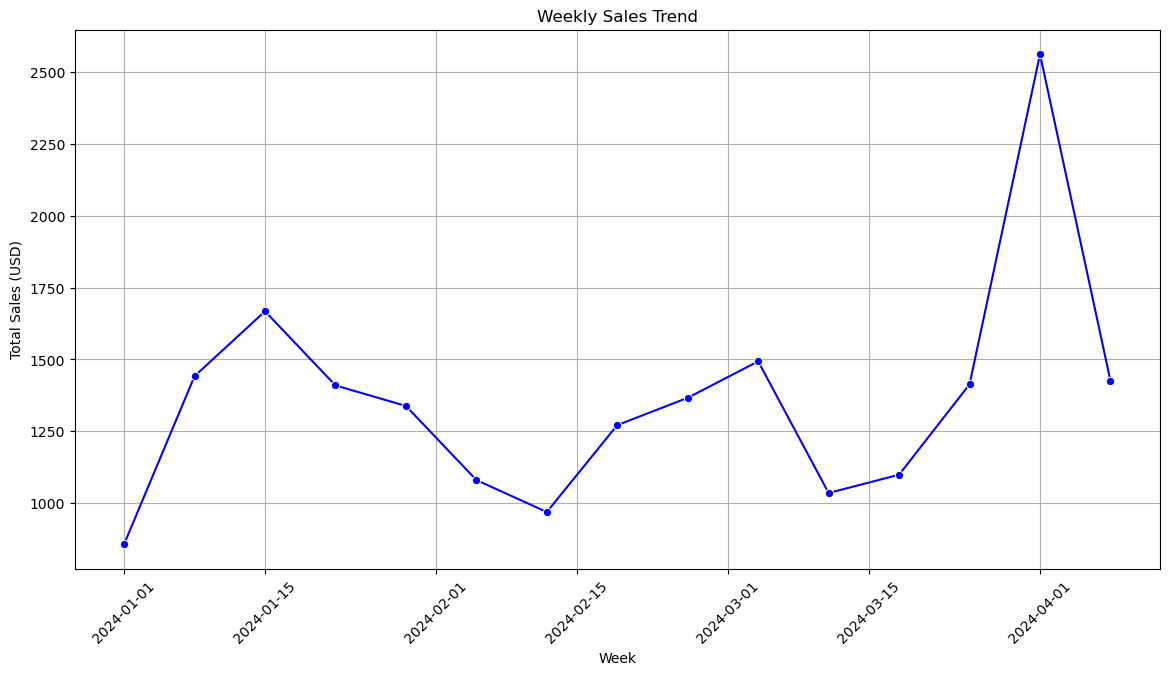

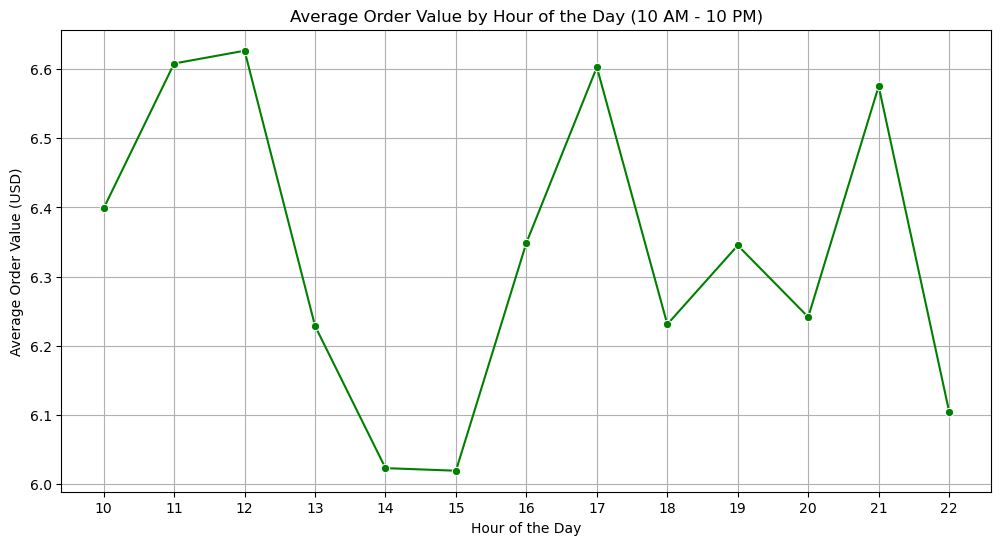

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import warnings
warnings.filterwarnings('ignore')

# Connect to the MySQL database
try:
    connection = mysql.connector.connect(
        host='34.170.97.145',
        user='root',
        password='password',
        database='crazykitchen'
    )
    
    if connection.is_connected():
        # Retrieve data from the database
        query = """
        SELECT ro.OrderID, ro.OrderDatetime, d.DishName, d.Price
        FROM RestaurantOrder ro
        JOIN OrderedDish od ON ro.OrderID = od.OrderID
        JOIN Dish d ON od.DishName = d.DishName
        """
        data = pd.read_sql(query, connection)
        
        # Convert OrderDatetime to datetime format
        data['OrderDatetime'] = pd.to_datetime(data['OrderDatetime'])

        # Extract hour and week from OrderDatetime
        data['Hour'] = data['OrderDatetime'].dt.hour
        data['Week'] = data['OrderDatetime'].dt.to_period('W').apply(lambda r: r.start_time)

        # Visualization: Weekly Sales Trend
        weekly_sales = data.groupby('Week')['Price'].sum().reset_index()
        weekly_sales.columns = ['Week', 'Total Sales']

        plt.figure(figsize=(14, 7))
        sns.lineplot(x='Week', y='Total Sales', data=weekly_sales, marker='o', color='blue')
        plt.title('Weekly Sales Trend')
        plt.xlabel('Week')
        plt.ylabel('Total Sales (USD)')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()

        # Visualization: Average Order Value by Hour of the Day (Limited to 10-22)
        average_order_value = data.groupby('Hour')['Price'].mean().reset_index()
        filtered_average_order_value = average_order_value[(average_order_value['Hour'] >= 10) & (average_order_value['Hour'] <= 22)]

        plt.figure(figsize=(12, 6))
        sns.lineplot(x='Hour', y='Price', data=filtered_average_order_value, marker='o', color='green')
        plt.title('Average Order Value by Hour of the Day (10 AM - 10 PM)')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Average Order Value (USD)')
        plt.xticks(range(10, 23))
        plt.grid(True)
        plt.show()

except mysql.connector.Error as e:
    print(f"Error: {e}")

finally:
    if connection.is_connected():
        connection.close()

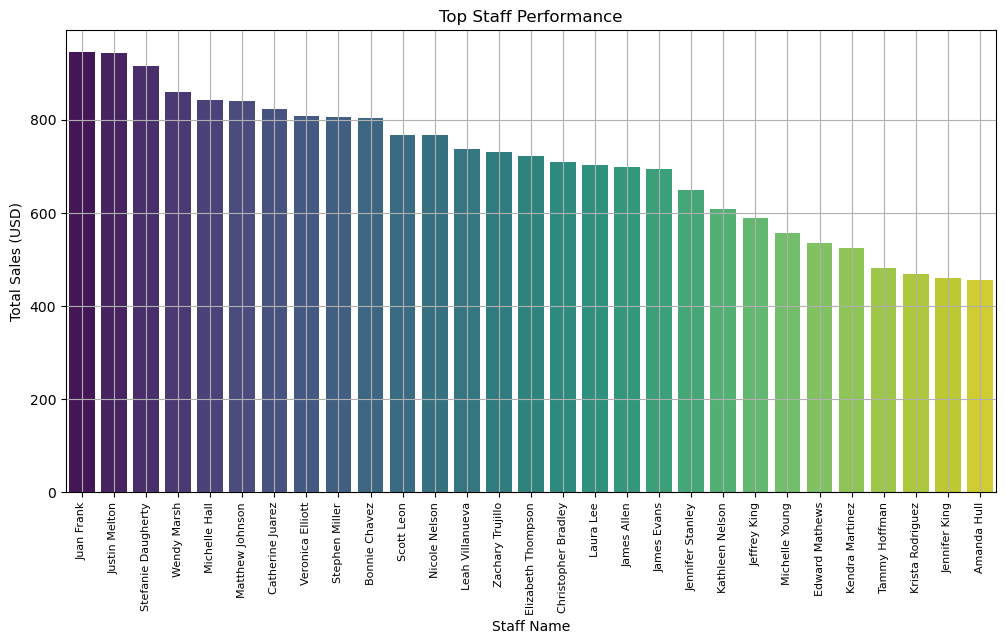

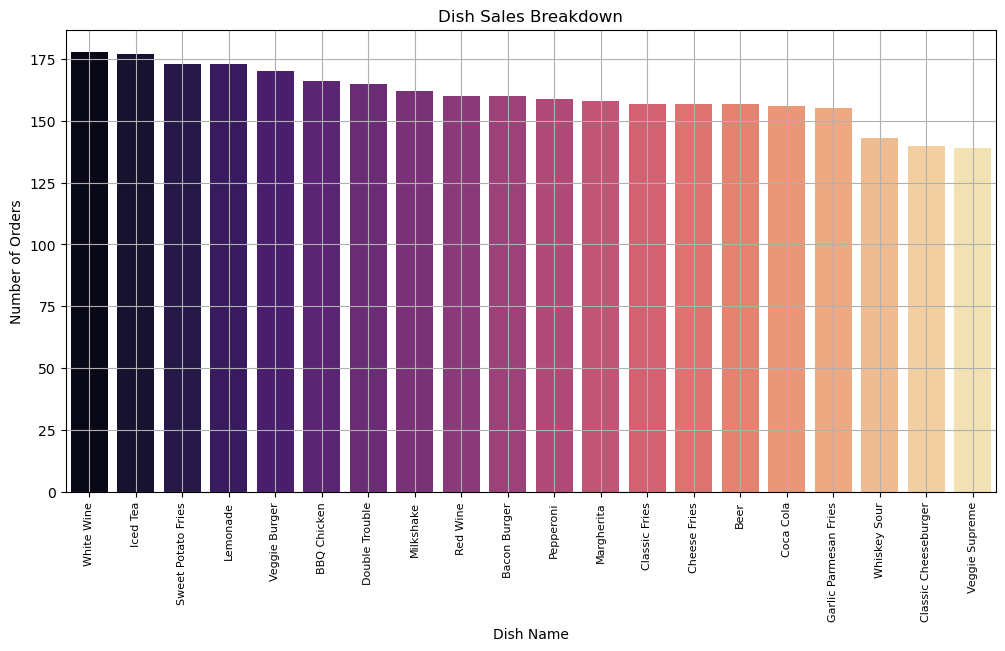

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import warnings
warnings.filterwarnings('ignore')

# Connect to the MySQL database
try:
    connection = mysql.connector.connect(
        host='34.170.97.145',
        user='root',
        password='password',
        database='crazykitchen'
    )
    
    if connection.is_connected():
        # Retrieve data from the database
        query = """
        SELECT ro.OrderID, ro.OrderDatetime, ro.TableNumber, s.Name AS StaffName, d.DishName, d.Price
        FROM RestaurantOrder ro
        JOIN OrderedDish od ON ro.OrderID = od.OrderID
        JOIN Dish d ON od.DishName = d.DishName
        JOIN Staff s ON ro.StaffID = s.StaffID
        """
        data = pd.read_sql(query, connection)
        
        # Convert OrderDatetime to datetime format
        data['OrderDatetime'] = pd.to_datetime(data['OrderDatetime'])
        data['Month'] = data['OrderDatetime'].dt.to_period('M').apply(lambda r: r.start_time)

        # Visualization: Top Staff Performance
        staff_sales = data.groupby('StaffName')['Price'].sum().reset_index()

        plt.figure(figsize=(12, 6))
        sns.barplot(x='StaffName', y='Price', data=staff_sales.sort_values(by='Price', ascending=False), palette='viridis')
        plt.title('Top Staff Performance')
        plt.xlabel('Staff Name')
        plt.ylabel('Total Sales (USD)')
        plt.xticks(rotation=90, fontsize=8)  # Set smaller font size for x-axis labels
        plt.grid(True)
        plt.show()

        # Visualization: Dish Sales Breakdown
        dish_sales = data['DishName'].value_counts().reset_index()
        dish_sales.columns = ['DishName', 'Number of Orders']

        plt.figure(figsize=(12, 6))
        sns.barplot(x='DishName', y='Number of Orders', data=dish_sales, palette='magma')
        plt.title('Dish Sales Breakdown')
        plt.xlabel('Dish Name')
        plt.ylabel('Number of Orders')
        plt.xticks(rotation=90, fontsize=8)  # Set smaller font size for x-axis labels
        plt.grid(True)
        plt.show()

except mysql.connector.Error as e:
    print(f"Error: {e}")

finally:
    if connection.is_connected():
        connection.close()

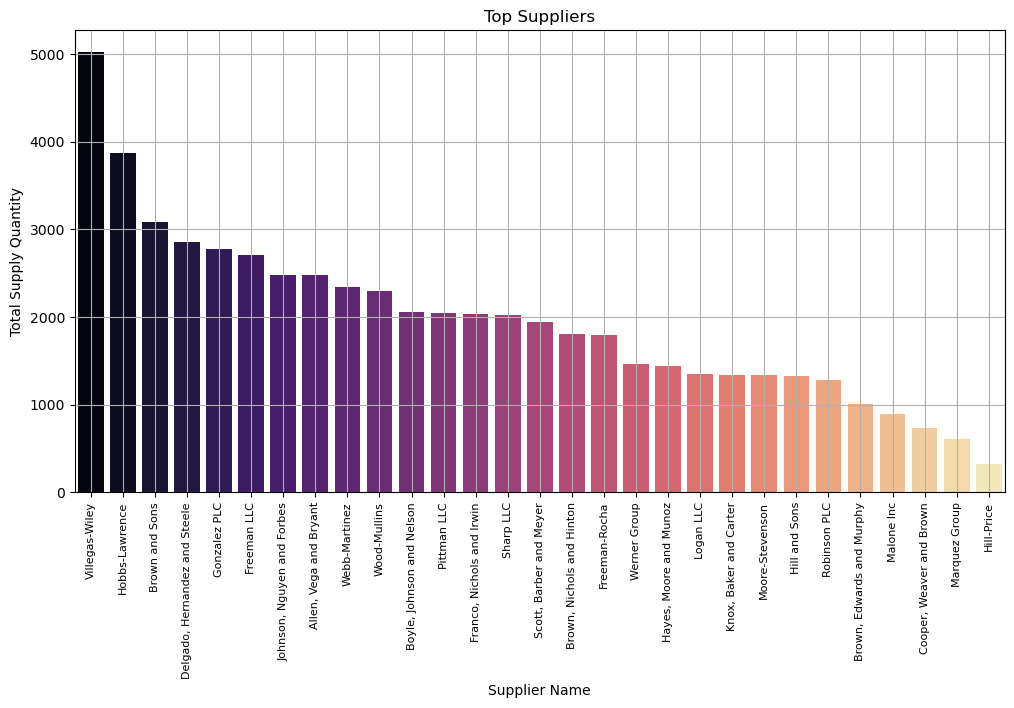

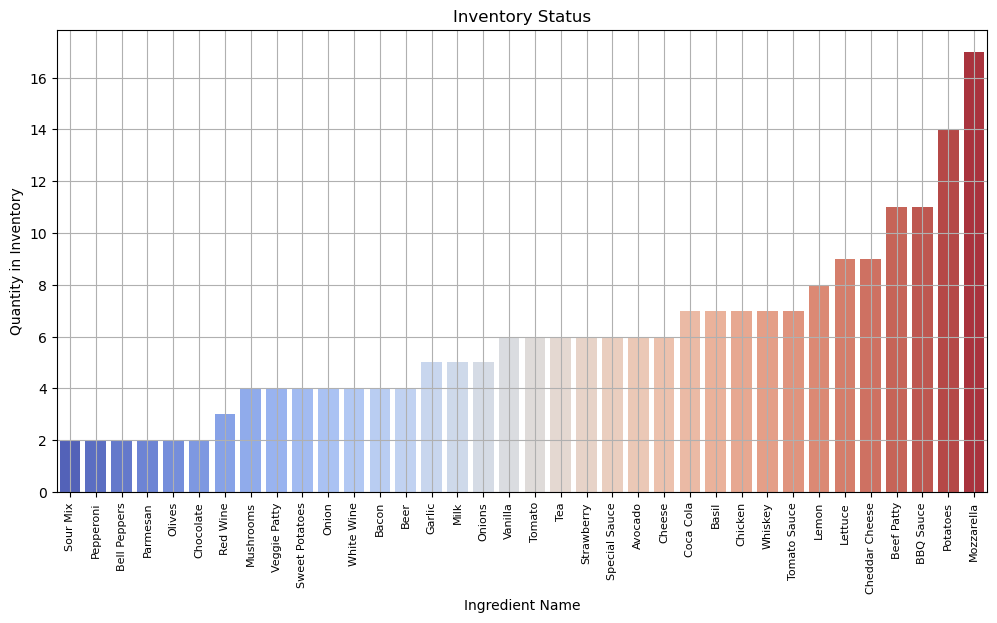

In [18]:
# Connect to the MySQL database
try:
    connection = mysql.connector.connect(
        host='34.170.97.145',
        user='root',
        password='password',
        database='crazykitchen'
    )
    
    if connection.is_connected():
        # Retrieve data from the database
        ingredient_usage_query = """
        SELECT i.IngredientName, SUM(iu.Quantity) AS TotalQuantity
        FROM IngredientsUsed iu
        JOIN Ingredient i ON iu.IngredientID = i.IngredientID
        GROUP BY i.IngredientName
        """
        ingredient_usage = pd.read_sql(ingredient_usage_query, connection)
        
        supplier_query = """
        SELECT s.Name AS SupplierName, SUM(isup.Quantity) AS TotalSupply
        FROM IngredientsSupplied isup
        JOIN Supplier s ON isup.SupplierID = s.SupplierID
        GROUP BY s.Name
        """
        supplier_data = pd.read_sql(supplier_query, connection)
        
        # Assuming we have inventory table to get the current status
        inventory_query = """
        SELECT i.IngredientName, iu.Quantity
        FROM IngredientsUsed iu
        JOIN Ingredient i ON iu.IngredientID = i.IngredientID
        """
        inventory_data = pd.read_sql(inventory_query, connection)
        
        # Sort supplier_data by TotalSupply in descending order
        supplier_data_sorted = supplier_data.sort_values(by='TotalSupply', ascending=False)
        
        # Visualization: Top Suppliers
        plt.figure(figsize=(12, 6))
        sns.barplot(x='SupplierName', y='TotalSupply', data=supplier_data_sorted, palette='magma')
        plt.title('Top Suppliers')
        plt.xlabel('Supplier Name')
        plt.ylabel('Total Supply Quantity')
        plt.xticks(rotation=90,fontsize=8)
        plt.grid(True)
        plt.show()

        # Sort inventory_status by Quantity in descending order
        inventory_status = inventory_data.groupby('IngredientName')['Quantity'].sum().reset_index()
        inventory_status_sorted = inventory_status.sort_values(by='Quantity', ascending=True)
        
        # Visualization: Inventory Status
        plt.figure(figsize=(12, 6))
        sns.barplot(x='IngredientName', y='Quantity', data=inventory_status_sorted, palette='coolwarm')
        plt.title('Inventory Status')
        plt.xlabel('Ingredient Name')
        plt.ylabel('Quantity in Inventory')
        plt.xticks(rotation=90, fontsize=8)
        plt.grid(True)
        plt.show()

except mysql.connector.Error as e:
    print(f"Error: {e}")

finally:
    if connection.is_connected():
        connection.close()